---
## Classification practice on iris data <br> <font size=3.4> Dataset:iris.csv<br><font size=2>Used logistic regression, various model validation techniques, and different ensemble methods to find the best model
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
filename= '/Users/Ketan/Datasets/iris.csv'

In [3]:
df = pd.read_csv(filename)
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
df = df.iloc[:,1:]
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df[df.duplicated()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
142,5.8,2.7,5.1,1.9,virginica


In [6]:
df = df.drop_duplicates()
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     49
Name: Species, dtype: int64

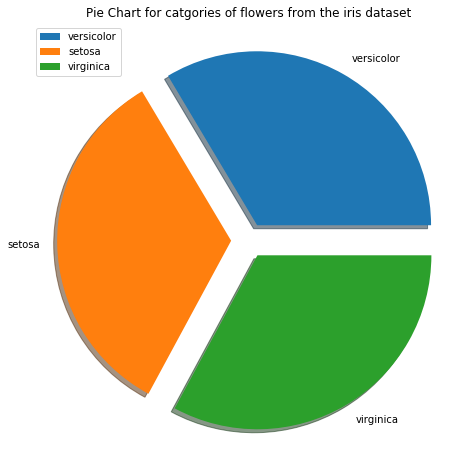

In [10]:
a= df.Species.value_counts()
categories= ['versicolor','setosa','virginica']

plt.figure(figsize=(8,8))
plt.pie(a,labels=categories, shadow= True, explode=[0.1,0.1,0.1])
plt.title('Pie Chart for catgories of flowers from the iris dataset')
plt.legend()

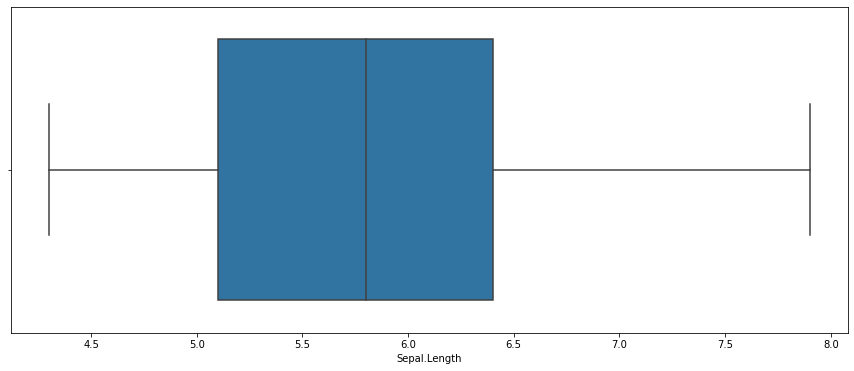

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Sepal.Length'])

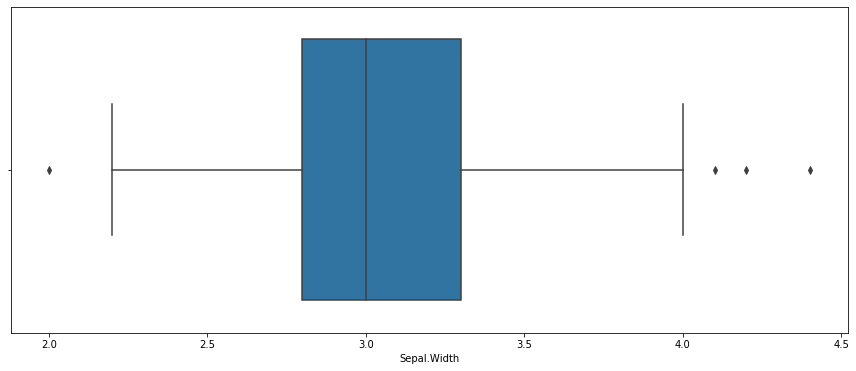

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Sepal.Width'])

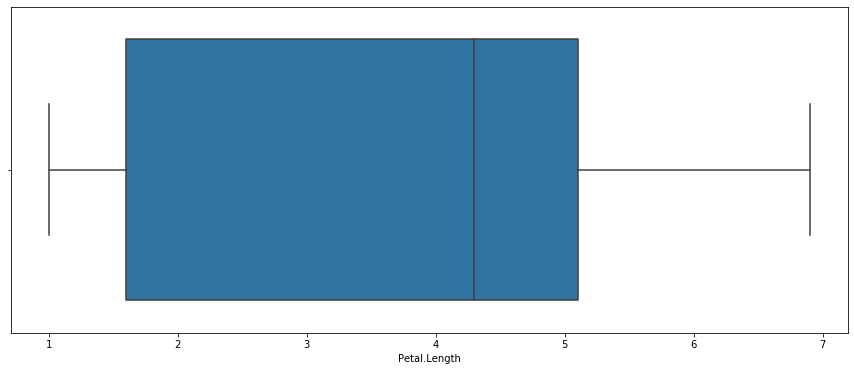

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Petal.Length'])

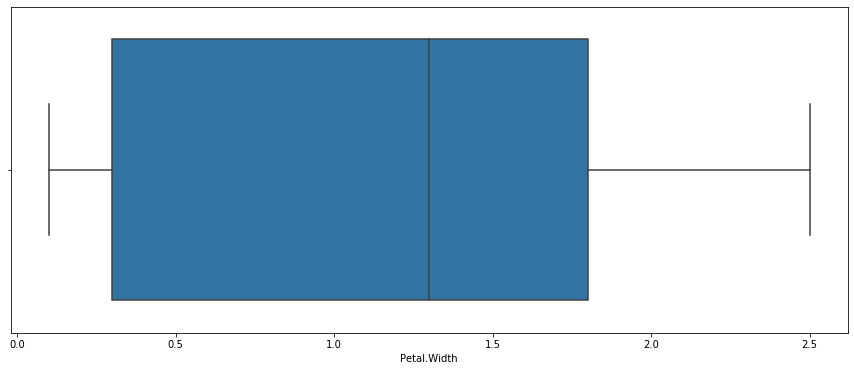

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Petal.Width'])

Text(0.5, 0.98, 'Histogram for flower species')

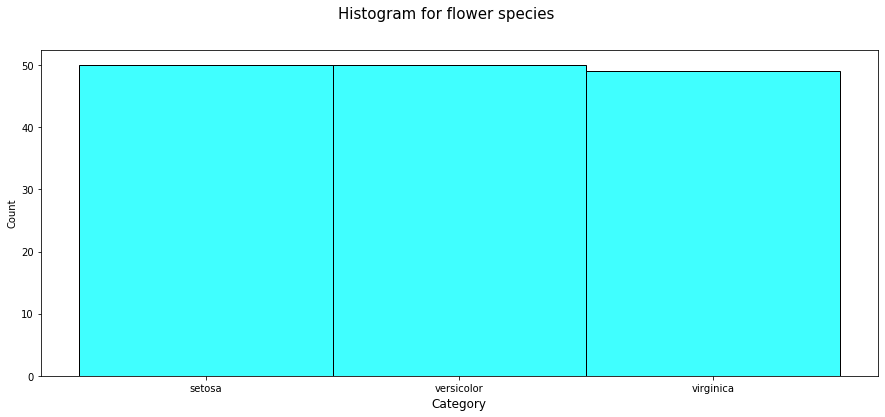

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(df.Species, color='cyan', edgecolor='black')
plt.xlabel('Category', fontsize=12)
plt.suptitle('Histogram for flower species', fontsize=15)

In [16]:
array = df.values
X= array[:,0:4]
Y= array[:,4]

###  Using simple logistic regression equation first

In [17]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X,Y)

#Predict for X dataset
y_pred1 = model1.predict(X)

y_pred_df1= pd.DataFrame({'actual': Y,'predicted_prob': model1.predict(X)})
y_pred_df1

,actual,predicted_prob
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
...,...,...
144,virginica,virginica
145,virginica,virginica
146,virginica,virginica
147,virginica,virginica


In [18]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        49

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



### Trial 1 : Train Test split approach

In [19]:
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
result2 = model2.score(X_test, Y_test)
result2

0.9

### Trial 2 : Cross Validation approach

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model3 = LogisticRegression(max_iter=400)
results3 = cross_val_score(model3, X, Y, cv=kfold)
print('Result:',np.round(results3.mean(),4),'\n','\n','Standard dev:',np.round(results3.std(),4))

Result: 0.88 
 
 Standard dev: 0.1485


### Trial 3 :  Leave One Out Cross Validation approach

In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = LeaveOneOut()
model4 = LogisticRegression(max_iter=400)
results4 = cross_val_score(model4, X, Y, cv=loocv)
print('Result:',np.round(results4.mean(),4),'\n','\n','Standard dev:',np.round(results4.std(),4))

Result: 0.953 
 
 Standard dev: 0.2116


### Since the CV score for LOOCV approach is the best, so we'll finalise this as our model validation technique, Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

### Trial-1: Bagging

In [22]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model5 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results5 = cross_val_score(model5, X, Y, cv=loocv)
print(results5.mean())

0.9530201342281879


### Trial-2: Random Forest

In [23]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 2
model6 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results6 = cross_val_score(model6, X, Y, cv=loocv)
print(results6.mean())

0.959731543624161


### Trial-3: Boosting

In [24]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results7 = cross_val_score(model7, X, Y, cv=loocv)
print(results7.mean())

0.9328859060402684


### Trial-4: Stacking

In [25]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model8_1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8_1))
model8_2 = DecisionTreeClassifier()
estimators.append(('cart', model8_2))
model8_3 = SVC()
estimators.append(('svm', model8_3))

# create the ensemble model
ensemble1 = VotingClassifier(estimators)
results8 = cross_val_score(ensemble1, X, Y, cv=loocv)
print(results8.mean())

0.959731543624161


In [26]:
# create the sub models
estimators = []
model9_1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model9_1))
model9_2 = DecisionTreeClassifier()
estimators.append(('cart', model9_2))
model9_3 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model9_3))

# create the ensemble model
ensemble2 = VotingClassifier(estimators)
results9 = cross_val_score(ensemble2, X, Y, cv=loocv)
print(results9.mean())

0.9530201342281879


In [27]:
# create the sub models
estimators = []
model10_1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model10_1))
model10_2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10_2))
model10_3 = SVC()
estimators.append(('svm', model10_3))

# create the ensemble model
ensemble3 = VotingClassifier(estimators)
results10 = cross_val_score(ensemble3, X, Y, cv=loocv)
print(results10.mean())

0.9664429530201343
